# Wolfe’s example

In [1]:
import jax.numpy as jnp
from jax import grad

def f(x):
    x1, x2 = x
    ans = (x1 > jnp.abs(x2))*5*jnp.sqrt(9*x1**2 + 16*x2**2) + (x1 <= jnp.abs(x2))*(9*x1 + 16*jnp.abs(x2))
    if ans.any() > 50:
        print(f"x1 {x1}, x2 {x2}, f {ans}")
    return ans

df = grad(f)

In [22]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import pyplot as plt

def plot_3d_function(x1, x2, f, title, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1 = x1.max()
    up_lim_2 = x2.max()
    X1, X2 = np.meshgrid(x1, x2) # grid of point
    Z = f((X1, X2)) # evaluation of the function on the grid

    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(8,4))
    fig.suptitle(title)
    #===============
    # First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    ax.xaxis._axinfo["grid"]['linestyle'] = ":"
    ax.yaxis._axinfo["grid"]['linestyle'] = ":"
    ax.zaxis._axinfo["grid"]['linestyle'] = ":"
    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
    alpha=0.8, cmap='coolwarm',  edgecolor='none')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, f(minima_), 'r*', markersize=10)


    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)
    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(Z,cmap="coolwarm", origin = "lower", extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2])
    cset = ax.contour(X1, X2, Z,linewidths=2,cmap="coolwarm")
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)

    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')
    plt.savefig('wolfe_3d.pdf')
    plt.show()


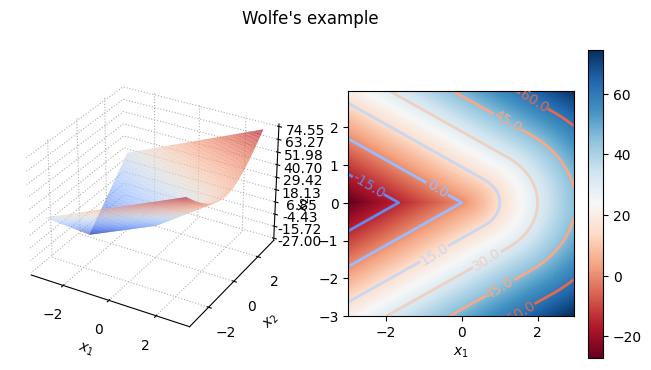

In [21]:
up_lim = 3
low_lim = -3
x1 = np.arange(low_lim, up_lim, 0.05)
x2 = np.arange(low_lim, up_lim, 0.05)
title = f"Wolfe's example"
plot_3d_function(x1, x2, f, title)

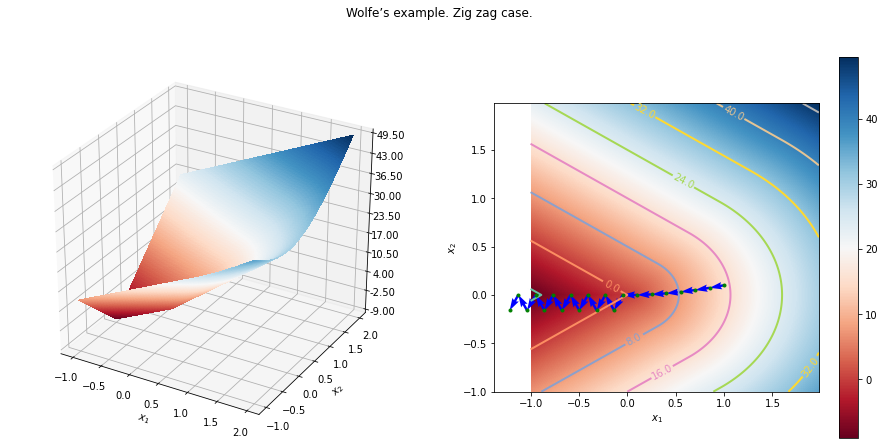

In [ ]:
from scipy.optimize import minimize_scalar
def steepest_descent(x_0, f, df, df_eps = 1e-2, max_iter = 100):
    x = np.array(x_0)
    iterations = [x_0]
    while np.linalg.norm(df(x)) > df_eps and len(iterations) <= max_iter:
        # res = minimize_scalar(lambda alpha: f(x - alpha * df(x)), bounds = (1e-8,1e-1), method='Bounded', options={'maxiter': 50})
        # print(res.x)
        # alpha_opt = res.x
        alpha_opt = 0.01
        x = x - alpha_opt * df(x)
        iterations.append(x)
    #print('Finished with', len(iterations), 'iterations')
    return iterations
x_0 = [1.0,0.1]
iterations = steepest_descent(x_0, f, df, max_iter=20)
title = f'Wolfe’s example. Zig zag case.'
up_lim = 2
low_lim = -1
x1 = np.arange(low_lim, up_lim, 0.02)
x2 = np.arange(low_lim, up_lim, 0.02)
plot_3d_function(x1, x2, f, title, iterations = iterations)


0.09999342
0.010272143


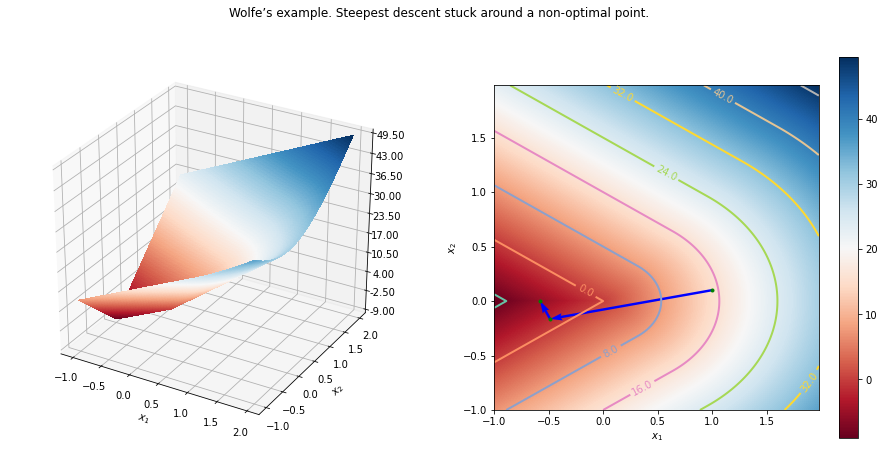

In [ ]:
from scipy.optimize import minimize_scalar
def steepest_descent(x_0, f, df, df_eps = 1e-2, max_iter = 100):
    x = np.array(x_0)
    iterations = [x_0]
    while np.linalg.norm(df(x)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x)), bounds = (1e-8,1e-1), method='Bounded', options={'maxiter': 50})
        print(res.x)
        alpha_opt = res.x
        # alpha_opt = 0.01
        x = x - alpha_opt * df(x)
        iterations.append(x)
    #print('Finished with', len(iterations), 'iterations')
    return iterations
x_0 = [1.0,0.1]
iterations = steepest_descent(x_0, f, df, max_iter=2)
title = f'Wolfe’s example. Steepest descent stuck around a non-optimal point.'
up_lim = 2
low_lim = -1
x1 = np.arange(low_lim, up_lim, 0.02)
x2 = np.arange(low_lim, up_lim, 0.02)
plot_3d_function(x1, x2, f, title, iterations = iterations)

# Least squares with $l_1$ regularization

$$
\min_{x \in \mathbb{R^n}} \dfrac{1}{2}\|Ax - b\|_2^2 + \lambda \|x\|_1
$$

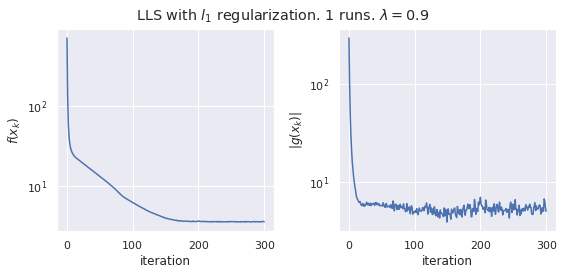

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(1)

# PARAMETERS
m = 20
n = 50
n_iter = 300
n_exp = 1
lam = 0.9
alpha = 0.01

f_vals_array = np.zeros((n_exp, n_iter+1))
g_norm_array = np.zeros((n_exp, n_iter+1))


def f(x, *f_params):
    A, b, lam = f_params
    return 0.5*np.linalg.norm(A@x - b, ord=2)**2 + lam*np.linalg.norm(x, ord=1)

def g(x, *f_params):
    A, b, lam = f_params
    return A.T@(A@x - b) + lam*np.sign(x)

def subgradient_descent(x_0, f, g, *f_params, alpha=0.001, n_iter=100):
    iterations = []
    f_vals     = []
    x          = np.array(x_0)
    iterations.append(x)
    f_vals.append(f(x, *f_params))
    for i_iter in range(n_iter):
        x = x - alpha * g(x, *f_params)
        iterations.append(x)
        f_vals.append(f(x, *f_params))
#     print(f'Finished with {len(iterations)} iterations and final value {f_vals[-1]}')
    return iterations, f_vals

A = np.random.randn(m, n)
b = np.random.randn(m)
for exp in range(n_exp):
    x_0 = np.random.randn(n)
    xs, f_vals_array[exp, :] = subgradient_descent(x_0, f, g, A, b, lam, alpha=alpha, n_iter = n_iter)
    g_norm_array[exp, :] = np.array([np.linalg.norm(g(x, A, b, lam)) for x in xs])
    
fig = plt.figure(figsize=(8,4))
fig.suptitle(f'LLS with $l_1$ regularization. {n_exp} runs. $\lambda = {lam}$')

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel(f'$f(x_k)$')
ax.set_xlabel('iteration')
ax.semilogy(f_vals_array.mean(axis=0)) 
ax.fill_between(np.arange(n_iter+1), f_vals_array.mean(axis=0) - f_vals_array.std(axis=0),  f_vals_array.mean(axis=0) + f_vals_array.std(axis=0), alpha=0.3)

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel(f'$\|g(x_k)\|$')
ax.set_xlabel('iteration')
ax.semilogy(g_norm_array.mean(axis=0)) 
ax.fill_between(np.arange(n_iter+1), g_norm_array.mean(axis=0) - g_norm_array.std(axis=0),  g_norm_array.mean(axis=0) + g_norm_array.std(axis=0), alpha=0.3)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('SD.svg')
# plt.show()
